In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
df= pd.read_csv("final_df.csv")

In [3]:
df.head()

,polarity,words,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,0,"{'awww': 1, 'bummer': 1, 'shoulda': 1, 'david'...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,"{'upset': 1, 'notupdate': 1, 'facebook': 1, 't...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,"{'dive': 1, 'many': 1, 'time': 1, 'ball': 1, '...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,"{'whole': 1, 'body': 1, 'feel': 1, 'itchy': 1,...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,"{'mad': 1, 'notsee': 1}",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# Renaming all features to be of capital letters or containing number like h_00
# That will help us when converting the dict of words to frequency encoding in order not to have any word
# that already existed in the previous features. (We are sure as our words are small and don't contain numbers)
df.rename(columns={"polarity":"Polarity", "words":"Words"}, inplace=True)

In [5]:
# Using 8 bits instead of 64 bits
for col in df.columns:
    if col!='Words':
        df[col] = df[col].astype(np.int8)

In [6]:
# Converting string dictionary to python dictionary
import ast

df['Words'] = df['Words'].apply(lambda x: ast.literal_eval(x))

## Doc2Vec

In [7]:
sample = df.sample(frac = 0.10, random_state=1)
sample.reset_index(drop=True, inplace=True)

In [8]:
sample.head()

,Polarity,Words,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,...,h_14,h_15,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23
0,0,"{'omg': 1, 'one': 1, 'year': 1, 'work': 1, 'pe...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,"{'meantime': 1, 'revision': 1, 'whilst': 1, 'l...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,"{'pierce': 1, 'fail': 1, 'time': 1, 'fuck': 1}",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,"{'win': 1, 'award': 1, 'play': 1, 'tennis': 1}",0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,"{'want': 1, 'back': 1, 'bed': 1, 'notwait': 1,...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
tweets = []
for i in range(len(sample)):
    tweet = []
    for word, freq in sample['Words'][i].items():
        for _ in range(freq):
            tweet.append(word)
    tweets.append(tweet)

In [10]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tweets)]
model = Doc2Vec(documents, vector_size=200, window=6, dm=0, workers=4, epochs=20)

In [11]:
vector = model.infer_vector(["abdallah", "loves", "machine", "learning"])

In [12]:
vector

array([-3.16383615e-02, -1.52328447e-03,  2.95450725e-02, -1.27936089e-02,
        3.79231013e-02,  3.01725343e-02, -5.79818944e-03,  5.78698702e-02,
       -3.00037432e-02, -3.89196202e-02,  5.96951954e-02, -2.20572967e-02,
       -3.24186459e-02, -6.15821928e-02, -3.66262905e-02, -1.88106261e-02,
       -4.15659063e-02, -7.39269750e-03,  8.99603814e-02,  7.54425824e-02,
        1.87367247e-03,  1.76399369e-02, -3.52165624e-02,  3.12999263e-02,
       -1.17613813e-02,  3.64797190e-02,  4.70612384e-02, -3.06939129e-02,
        2.16685496e-02, -1.77661050e-02, -8.12611636e-03,  5.96638955e-03,
        6.88010873e-03,  2.14303657e-02, -2.00762991e-02, -1.46903293e-02,
       -1.23135634e-02,  1.27250440e-02, -6.96346611e-02, -5.45084616e-03,
       -2.22005602e-02, -4.22725268e-02,  8.75864085e-03, -6.44688755e-02,
        3.10400948e-02, -6.93163052e-02, -8.57629105e-02, -8.17412883e-02,
       -2.22625975e-02,  6.67161494e-03,  1.17315063e-02,  3.02665103e-02,
        8.64603892e-02,  

In [13]:
def dict2list(x):
    tweet = []
    for word, freq in x.items():
        for _ in range(freq):
            tweet.append(word)
    return tweet

In [14]:
sample['List'] = sample['Words'].apply(dict2list)
sample['Vec'] = sample['List'].apply(lambda x: model.infer_vector(x))
sample.head()

,Polarity,Words,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,...,h_16,h_17,h_18,h_19,h_20,h_21,h_22,h_23,List,Vec
0,0,"{'omg': 1, 'one': 1, 'year': 1, 'work': 1, 'pe...",1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[omg, one, year, work, permit, home, end, june...","[-0.13038254, 0.029765949, 0.17831293, -0.0318..."
1,1,"{'meantime': 1, 'revision': 1, 'whilst': 1, 'l...",0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"[meantime, revision, whilst, look, forward, ap...","[0.1363022, 0.032190282, 0.3126327, -0.0845825..."
2,1,"{'pierce': 1, 'fail': 1, 'time': 1, 'fuck': 1}",0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,"[pierce, fail, time, fuck]","[-0.02143001, -0.02530035, -0.020128638, 0.072..."
3,1,"{'win': 1, 'award': 1, 'play': 1, 'tennis': 1}",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,"[win, award, play, tennis]","[-0.14658077, 0.011355252, 0.13614324, -0.0643..."
4,0,"{'want': 1, 'back': 1, 'bed': 1, 'notwait': 1,...",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[want, back, bed, notwait, leave]","[-0.045322955, -0.035022803, 0.16058657, 0.070..."


In [15]:
columns_names = []
for i in range(200):
    columns_names.append('v_' + str(i))

In [16]:
ll = []
for i in range(len(sample)):
    ll.append(sample['Vec'][i])

In [17]:
dd = pd.DataFrame(ll, columns=columns_names)
dd.head()

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_190,v_191,v_192,v_193,v_194,v_195,v_196,v_197,v_198,v_199
0,-0.130383,0.029766,0.178313,-0.031804,0.089840,0.145571,-0.138609,-0.077152,0.001034,0.049573,...,-0.029461,0.060027,0.108173,-0.263888,0.027643,0.159274,-0.171182,-0.258706,-0.014311,-0.047667
1,0.136302,0.032190,0.312633,-0.084583,0.276073,0.129567,-0.088580,0.089053,-0.142236,-0.131869,...,-0.010141,-0.021621,0.132926,0.001602,0.115492,0.038260,-0.290582,0.116973,-0.083854,0.202028
2,-0.021430,-0.025300,-0.020129,0.072052,0.214903,-0.057166,-0.042060,0.074062,0.105807,-0.030784,...,-0.105060,0.090128,0.019890,-0.113018,0.102898,0.093530,-0.191843,-0.060952,-0.093834,0.080849
3,-0.146581,0.011355,0.136143,-0.064345,0.019713,0.109728,-0.060313,0.116810,-0.098593,-0.058126,...,0.016752,-0.022499,0.008806,0.000792,0.036205,0.127451,-0.018426,-0.219273,-0.032753,0.058241
4,-0.045323,-0.035023,0.160587,0.070758,0.104999,0.038984,-0.010607,0.062366,-0.119844,-0.156563,...,-0.056446,0.037184,0.093211,-0.055872,0.186633,0.188307,-0.195079,-0.058577,-0.002257,0.070976


In [18]:
sample.drop(columns = ['Words', 'List', 'Vec'], inplace = True)
sample = sample.join(dd)
sample.head()

,Polarity,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,h_01,...,v_190,v_191,v_192,v_193,v_194,v_195,v_196,v_197,v_198,v_199
0,0,1,0,0,0,0,0,0,0,0,...,-0.029461,0.060027,0.108173,-0.263888,0.027643,0.159274,-0.171182,-0.258706,-0.014311,-0.047667
1,1,0,0,0,0,0,1,0,0,0,...,-0.010141,-0.021621,0.132926,0.001602,0.115492,0.038260,-0.290582,0.116973,-0.083854,0.202028
2,1,0,0,0,0,0,1,0,0,0,...,-0.105060,0.090128,0.019890,-0.113018,0.102898,0.093530,-0.191843,-0.060952,-0.093834,0.080849
3,1,0,0,0,1,0,0,0,0,0,...,0.016752,-0.022499,0.008806,0.000792,0.036205,0.127451,-0.018426,-0.219273,-0.032753,0.058241
4,0,0,0,1,0,0,0,0,0,0,...,-0.056446,0.037184,0.093211,-0.055872,0.186633,0.188307,-0.195079,-0.058577,-0.002257,0.070976


In [19]:
X = sample.iloc[:,1:]
y = sample.iloc[:,0]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_test

,Fri,Mon,Sat,Sun,Thu,Tue,Wed,h_00,h_01,h_02,...,v_190,v_191,v_192,v_193,v_194,v_195,v_196,v_197,v_198,v_199
101847,0,0,0,1,0,0,0,0,0,0,...,0.042756,0.078091,-0.017422,-0.071239,0.006682,0.106819,-0.143398,-0.147805,0.032440,0.096563
68123,1,0,0,0,0,0,0,0,0,0,...,0.090939,0.103049,-0.106083,-0.077965,0.138254,0.227755,-0.216773,-0.329074,0.133957,0.012850
130461,0,0,0,0,1,0,0,0,0,0,...,0.002580,0.061666,-0.003423,-0.009292,0.005393,-0.007866,-0.087727,-0.067810,-0.122986,0.025643
97279,0,0,0,1,0,0,0,0,1,0,...,0.001526,-0.133655,-0.015561,-0.118035,0.135140,0.142075,-0.176731,-0.042609,-0.016403,0.135715
54276,1,0,0,0,0,0,0,0,0,0,...,0.027112,-0.045717,0.016223,-0.034567,0.070580,0.024492,-0.077940,-0.035878,-0.033077,-0.004129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91409,1,0,0,0,0,0,0,0,0,0,...,-0.048938,-0.032072,0.180386,0.082053,0.000733,0.091783,-0.203615,-0.126487,-0.015895,0.089213
52102,1,0,0,0,0,0,0,0,0,0,...,-0.071378,-0.045692,0.214917,0.019808,0.024799,0.095560,-0.162742,0.004345,0.006955,0.184558
110565,1,0,0,0,0,0,0,0,0,0,...,-0.030974,-0.004274,-0.140767,-0.005528,0.122783,0.292704,0.044716,-0.204207,-0.046945,0.111337
12292,0,0,0,0,0,1,0,0,0,0,...,-0.063768,-0.077482,0.081381,-0.075541,0.108989,0.031189,-0.134426,-0.091141,0.045226,0.084657


In [22]:
y_test

101847    0
68123     0
130461    0
97279     0
54276     0
         ..
91409     1
52102     1
110565    0
12292     0
90786     0
Name: Polarity, Length: 29927, dtype: int8

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
LR_pred = LR_clf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     15129
           1       0.72      0.74      0.73     14798

    accuracy                           0.73     29927
   macro avg       0.73      0.73      0.73     29927
weighted avg       0.73      0.73      0.73     29927



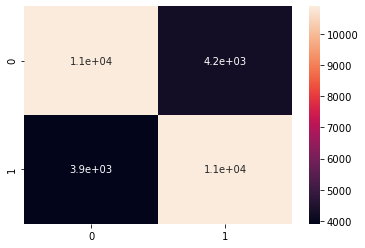

In [25]:
LR_cf_matrix = confusion_matrix(y_test, LR_pred)
sns.heatmap(LR_cf_matrix, annot=True);

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
DT_pred = DT_clf.predict(X_test)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61     15129
           1       0.60      0.60      0.60     14798

    accuracy                           0.60     29927
   macro avg       0.60      0.60      0.60     29927
weighted avg       0.60      0.60      0.60     29927



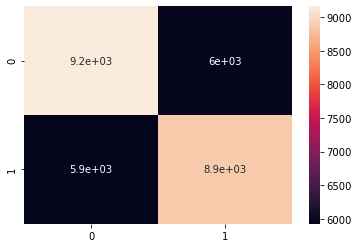

In [28]:
DT_cf_matrix = confusion_matrix(y_test, DT_pred)
sns.heatmap(DT_cf_matrix, annot=True);

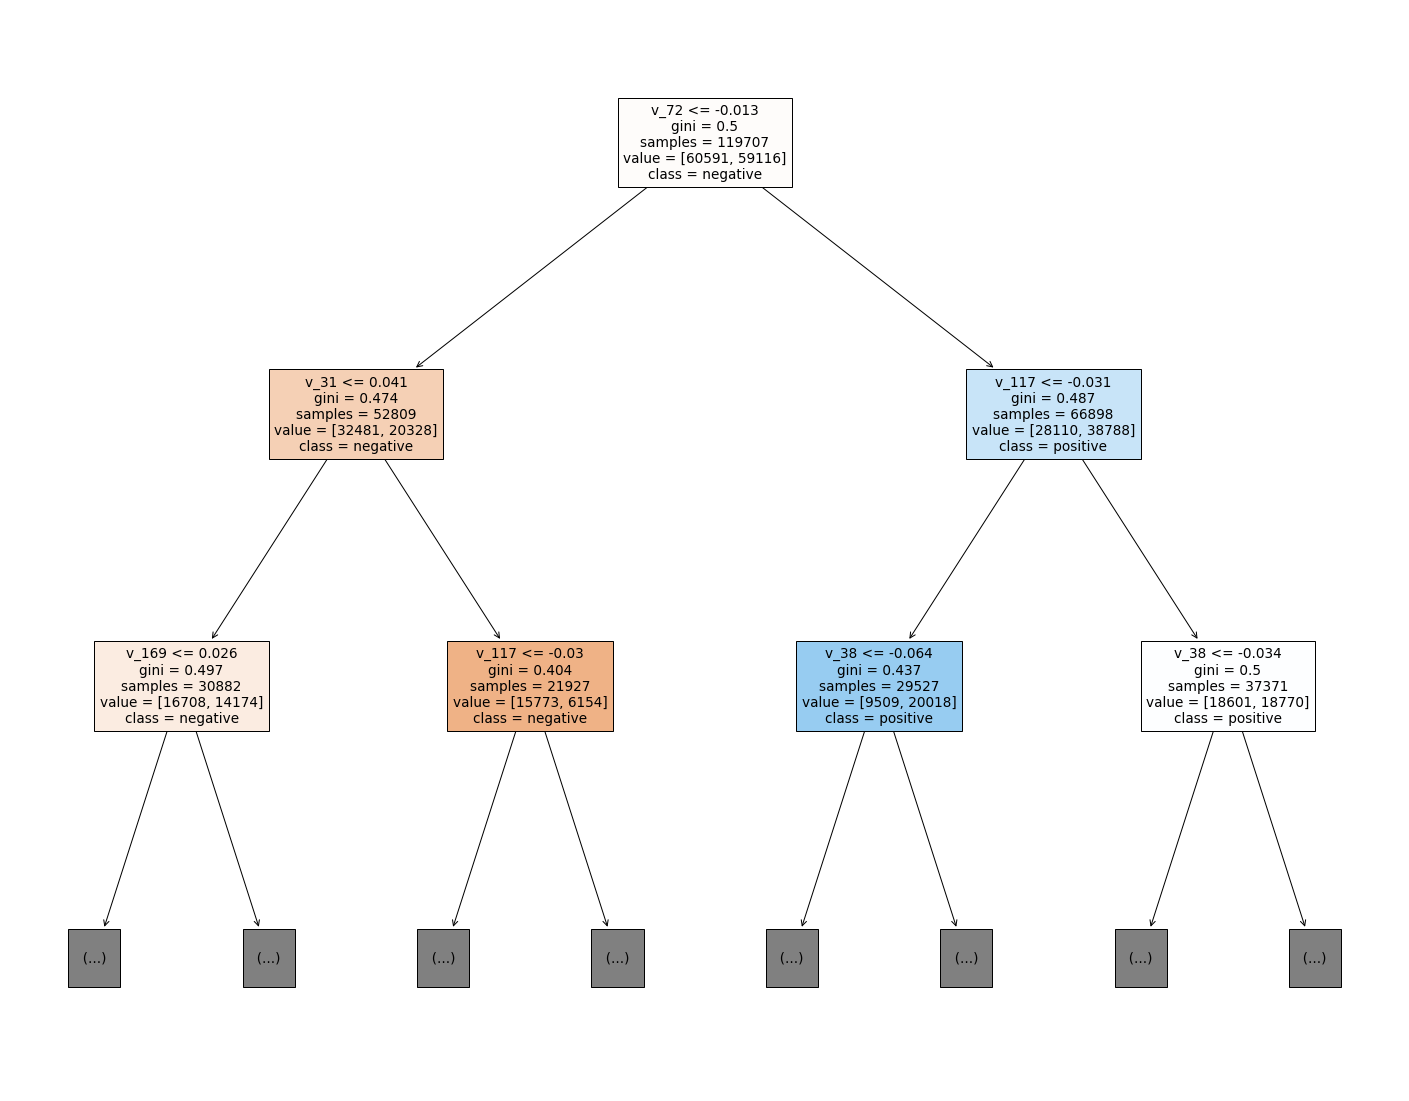

In [29]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25,20))
plot_tree(DT_clf, max_depth=2, feature_names=X_test.columns, class_names=["negative", "positive"], filled=True);

## Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
NV_clf = GaussianNB().fit(X_train, y_train)
NV_pred = NV_clf.predict(X_test)

In [31]:
print(classification_report(y_test, NV_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     15129
           1       0.68      0.72      0.70     14798

    accuracy                           0.70     29927
   macro avg       0.70      0.70      0.70     29927
weighted avg       0.70      0.70      0.70     29927



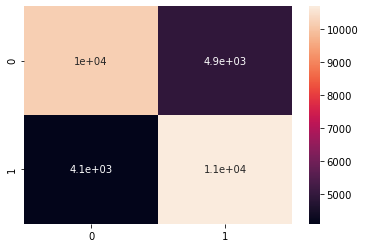

In [32]:
NV_cf_matrix = confusion_matrix(y_test, NV_pred)
sns.heatmap(NV_cf_matrix, annot=True);

## Neural Network with validation set

This Neural network uses 10% of the traning data as validation set, and it terminates the trainging when validation score is not improving by at least 
1e-5 for 10 consecutive iterations

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
NN_clf_stop = MLPClassifier(random_state=1, max_iter=30, hidden_layer_sizes=(16,16), tol=1e-5, early_stopping=True, learning_rate_init=0.01)
NN_clf_stop.fit(X_train, y_train)
NN_pred_stop = NN_clf_stop.predict(X_test)

In [35]:
print(classification_report(y_test, NN_pred_stop))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74     15129
           1       0.73      0.74      0.74     14798

    accuracy                           0.74     29927
   macro avg       0.74      0.74      0.74     29927
weighted avg       0.74      0.74      0.74     29927



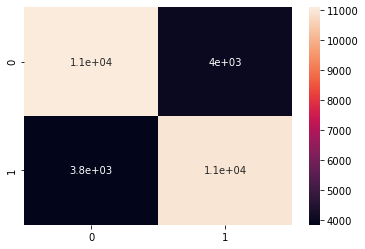

In [36]:
NN_cf_matrix_stop = confusion_matrix(y_test, NN_pred_stop)
sns.heatmap(NN_cf_matrix_stop, annot=True);

In [37]:
print("The number of iterations done is ", NN_clf_stop.n_iter_)

The number of iterations done is  26


## Stochastic Gradient Descent Linear SVM 

In [38]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [39]:
SGD_SVM_clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=500, tol=1e-3))

In [40]:
SGD_SVM_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=500))])

In [41]:
SGD_SVM_pred = SGD_SVM_clf.predict(X_test)

In [42]:
print(classification_report(y_test, SGD_SVM_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     15129
           1       0.71      0.72      0.72     14798

    accuracy                           0.72     29927
   macro avg       0.72      0.72      0.72     29927
weighted avg       0.72      0.72      0.72     29927



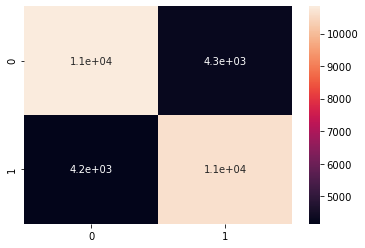

In [43]:
SGD_SVM_cf_matrix = confusion_matrix(y_test, SGD_SVM_pred)
sns.heatmap(SGD_SVM_cf_matrix, annot=True);